In [86]:
import os
import pathlib
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import sleep

In [52]:
PAYMENTS_MAIN_CATEGORIZED_V1_PATH = pathlib.Path(os.getcwd()) / ".." / "data" / "processed" / "previous_categorized" / "payments_categorized_v1.tsv"
PAYMENTS_MAIN_CATEGORIZED_V2_PATH = pathlib.Path(os.getcwd()) / ".." / "data" / "processed" / "previous_categorized" / "payments_categorized_v2.tsv"


In [53]:
PAYMENTS_MAIN_CATEGORIZED_PATH = PAYMENTS_MAIN_CATEGORIZED_V1_PATH

In [54]:
df = pd.read_csv(PAYMENTS_MAIN_CATEGORIZED_PATH, sep="\t")
df.head()

,Date,Amount,Description,Category
0,07.11.2024,40500.00,За тур.поездку по договору №001 от 27.01.2023г,SERVICE
1,07.11.2024,"32600,00",За оказание услуг по договору №53Б-02746 от 23...,SERVICE
2,07.11.2024,4710-00,Оплата штрафа,TAX
3,07.11.2024,30900-00,Лечение по договору №Д-00359/24 от 08.03.2025,SERVICE
4,07.11.2024,13200.00,Оплата основного долга за период с 16.12.2024г...,LOAN


In [55]:
def categories_plot(df):
    value_counts = df['Category'].value_counts()
    print(value_counts)
    
    sns.barplot(
    x=value_counts.index,
    y=value_counts,
    palette='coolwarm',
    hue=value_counts
    )
    plt.xlabel('Categories', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title('Распределение Categories', fontsize=14)
    plt.xticks(rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

Category
SERVICE           4953
FOOD_GOODS        4787
NON_FOOD_GOODS    3564
TAX               2215
LOAN              2077
LEASING           1841
BANK_SERVICE      1536
REAL_ESTATE       1435
NOT_CLASSIFIED    1260
Name: count, dtype: int64


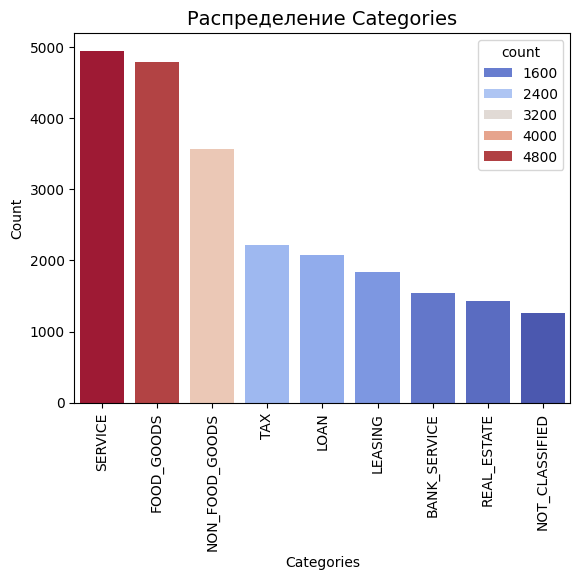

In [56]:
categories_plot(df)

In [57]:
df_sorted = df.sort_values(by='Category', ascending=False).reset_index(drop=True)
df_sorted

,Date,Amount,Description,Category
0,07.11.2024,2910.00,Оплата за Подушечки Любятово с шоколадной начи...,TAX
1,07.11.2024,424000000.00,Предоставление денежных срдеств по договору за...,TAX
2,07.11.2024,"3240,00",Оплата налога,TAX
3,07.11.2024,1850.00,Оплата государственной пошлины,TAX
4,07.11.2024,2380-00,Оплата штрафа,TAX
...,...,...,...,...
23663,07.11.2024,1480000.00,Окончательный расчет по акту приема-передачи №...,BANK_SERVICE
23664,07.11.2024,"48500,00",Оплата за консультирование в сфере информацион...,BANK_SERVICE
23665,07.11.2024,1880.00,Оплата за Салфетки Красная цена бумажные 24*24...,BANK_SERVICE
23666,07.11.2024,2810000.00,Предоставление кредита по договору №79-03400 о...,BANK_SERVICE


In [58]:
def most_frequent_category_and_merge(df):
    most_common_categories = df.groupby('Description')['Category'].agg(pd.Series.mode)
    
    df_merged = df.merge(most_common_categories, on='Description', how='left')
    df_result = df_merged[df_merged['Category_x'].isin(df_merged['Category_y'])]
    df_result = df_result.drop_duplicates(subset=['Description'])
    df_result = df_result.drop('Category_y', axis=1)
    
    df_result = df_result.rename(columns={'Category_x': 'Category'})
    return df_result

In [59]:
df_unduped = most_frequent_category_and_merge(df_sorted).reset_index(drop=True)
df_unduped

,Date,Amount,Description,Category
0,07.11.2024,2910.00,Оплата за Подушечки Любятово с шоколадной начи...,TAX
1,07.11.2024,424000000.00,Предоставление денежных срдеств по договору за...,TAX
2,07.11.2024,"3240,00",Оплата налога,TAX
3,07.11.2024,1850.00,Оплата государственной пошлины,TAX
4,07.11.2024,2380-00,Оплата штрафа,TAX
...,...,...,...,...
19052,07.11.2024,1480000.00,Окончательный расчет по акту приема-передачи №...,BANK_SERVICE
19053,07.11.2024,"48500,00",Оплата за консультирование в сфере информацион...,BANK_SERVICE
19054,07.11.2024,1880.00,Оплата за Салфетки Красная цена бумажные 24*24...,BANK_SERVICE
19055,07.11.2024,2810000.00,Предоставление кредита по договору №79-03400 о...,BANK_SERVICE


Category
SERVICE           4382
FOOD_GOODS        4357
NON_FOOD_GOODS    3186
LOAN              1970
LEASING           1731
REAL_ESTATE       1243
BANK_SERVICE       943
TAX                698
NOT_CLASSIFIED     547
Name: count, dtype: int64


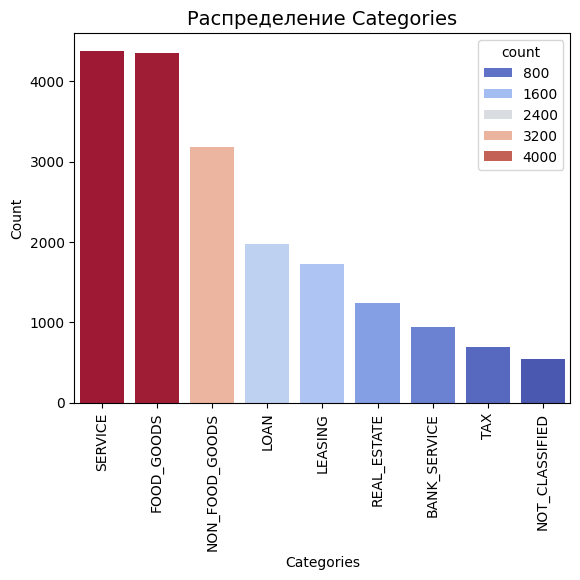

In [60]:
categories_plot(df_unduped)

In [61]:
df_to_handwrite = df_unduped[['Description', 'Category']]
df_to_handwrite

,Description,Category
0,Оплата за Подушечки Любятово с шоколадной начи...,TAX
1,Предоставление денежных срдеств по договору за...,TAX
2,Оплата налога,TAX
3,Оплата государственной пошлины,TAX
4,Оплата штрафа,TAX
...,...,...
19052,Окончательный расчет по акту приема-передачи №...,BANK_SERVICE
19053,Оплата за консультирование в сфере информацион...,BANK_SERVICE
19054,Оплата за Салфетки Красная цена бумажные 24*24...,BANK_SERVICE
19055,Предоставление кредита по договору №79-03400 о...,BANK_SERVICE


In [62]:
df_to_handwrite.to_csv("payments_handwritten_v1.tsv", sep="\t")

In [63]:
import google.generativeai as genai

In [ ]:
test_system_prompt = """
Ты являешься экспертом по классификации платежей. Перед тобой набор данных, где каждая строка представляет один платеж. Твоя задача - определить наиболее вероятную категорию или категории каждого платежа из следующего списка:

* **BANK_SERVICE:** Банковские услуги, комиссии банка, кредиты, платежи за счёт банка, кредиты на покупку имущества, предоставление кредита
* **FOOD_GOODS:** Продукты питания, оплата еды
* **NON_FOOD_GOODS:** Непродовольственные товары, химикаты, косметика, одежда, бытовые товары
* **LEASING:** Лизинговые платежи, договоры лизинга, акты приема-передачи
* **LOAN:** Платежи по кредитам, процентные займы, договоры займа
* **REAL_ESTATE:** Операции с недвижимостью, инвестиции в недвижимость, аренда недвижимости, паевые взносы, покупка недвижимости, оплата аренды, жилое помещение
* **SERVICE:** Услуги (консалтинг, ремонт, транспорт и т.д.), оплата коммунальных услуг, лечение по договору,
* **TAX:** Налоги, сборы, штрафы, пошлины
* **NOT_CLASSIFIED:** Переводы на собственный счёт, оплата за сброс загрязняющих веществ, оборотные средства или если платёж не похож на любую другую категорию или имеет с ними слишком мало общего


Данные будут представлены в виде строк, где поля разделены табуляцией. Первое - индекс, второе - описание(любой формат), третье - категория платежа


ТЫ ДОЛЖЕН ОБОЗНАЧИТЬ СТРОКИ, КОТОРЫЕ НЕ СООТВЕТСТВУЮТ СВОИМ КАТЕГОРИЯМ И ДАТЬ ИМ НОВЫЕ КАТЕГОРИИ В ФОРМАТЕ {'description', 'predicted_category'}


ЖДИ ЗАПРОС С ДАННЫМИ
"""

---

In [88]:
GOOGLE_API_KEY = os.environ.get('GOOGLE_API_KEY')
if GOOGLE_API_KEY is None:
    GOOGLE_API_KEY = input('Enter your Google API key: \n')
genai.configure(api_key=GOOGLE_API_KEY)

In [66]:
model = genai.GenerativeModel(
    model_name="gemini-1.5-flash-002",
    system_instruction=test_system_prompt)

In [68]:
chunk_size = 50

chunk_step = len(df_to_handwrite) // chunk_size
chunk_step

381

In [70]:
chunks_raw = {str(i):{} for i in range(chunk_step)}
chunks_processed = {str(i):{} for i in range(chunk_step)}

In [81]:
for i in range(len(chunks_raw)):
    for j in range(chunk_size):
        row = df_to_handwrite.iloc[i*chunk_size + j]
        item = row['Description'].strip() + '\t' + row['Category'].strip()
        
        chunks_raw[str(i)][str(j)] = item

In [85]:
def contents_from_chunk(chunk):
    contents = str()
    for i in range(chunk_size):
        contents += chunk[str(i)].strip() + '\n'
    return contents.strip()

In [92]:
while chunks_processed[str(chunk_step - 1)] == {}:
    for index_chunk in chunks_raw:
        if chunks_processed[index_chunk] == {}:
            response = model.generate_content(contents_from_chunk(chunks_raw[index_chunk]))
            response_str = response.text.strip('```json\n').replace("'", '"')
            
            print(response_str)

[
  {"description": "Возврат денежных средств по договору займа №373 от 26.02.2024г.. Без НДС", "mislead_category": "TAX", "predicted_category": "LOAN"},
  {"description": "Оплата за Кружка Пластишка детская в ассортименте 180мл по счету 89036727076431687439 от 2023.06.23 Сумма 2440,00", "mislead_category": "TAX", "predicted_category": "NON_FOOD_GOODS"},
  {"description": "Оплата за Размещение рекламы по счету 00407363845372991618 от 04.08.2024; Договор №А-00795/35 от 2026-11-22", "mislead_category": "TAX", "predicted_category": "SERVICE"},
  {"description": "Предоставление кредита по договору №А-03828/92 от 25.03.2023 (приобретение товаров длительного пользования)", "mislead_category": "TAX", "predicted_category": "BANK_SERVICE"},
  {"description": "За аренду машины/автомобиля по договору №246 от 22.05.2028", "mislead_category": "TAX", "predicted_category": "SERVICE"},
  {"description": "Оплата минеральной питьевой воды по счету 48827801414188975933 от 15.10.2024г Сумма 7300-00 без уч

KeyboardInterrupt: 

---

In [150]:
import json
import seaborn as sns
import pandas as pd

In [151]:
with open('unfiltered.json', 'r') as f:
    data = json.load(f)
    
    unfiltered = pd.DataFrame(data)

In [152]:
def categories_plot(df):
    value_counts = df['Category'].value_counts()
    print(value_counts)
    
    sns.barplot(
    x=value_counts.index,
    y=value_counts,
    palette='coolwarm',
    hue=value_counts
    )
    plt.xlabel('Categories', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title('Распределение Categories', fontsize=14)
    plt.xticks(rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

In [153]:
unfiltered

,description,mislead_category,predicted_category
0,Возврат денежных средств по договору займа №37...,TAX,LOAN
1,Оплата за Кружка Пластишка детская в ассортиме...,TAX,NON_FOOD_GOODS
2,Оплата за Размещение рекламы по счету 00407363...,TAX,SERVICE
3,Предоставление кредита по договору №А-03828/92...,TAX,BANK_SERVICE
4,За аренду машины/автомобиля по договору №246 о...,TAX,SERVICE
...,...,...,...
3289,За участие в конференции в г. Саранск по догов...,REAL_ESTATE,SERVICE
3290,"Оплата по счету 0366,0367,0368 от 16/09/2024г....",REAL_ESTATE,LEASING
3291,Оплата минеральной питьевой воды по счету 4348...,REAL_ESTATE,FOOD_GOODS
3292,Оплата по счету #0017 от 18.07.2023 г. за яхту...,REAL_ESTATE,NOT_CLASSIFIED


In [154]:
mask = unfiltered['mislead_category'] != unfiltered['predicted_category']

In [155]:
unfiltered = unfiltered[mask].reset_index(drop=True)
unfiltered

,description,mislead_category,predicted_category
0,Возврат денежных средств по договору займа №37...,TAX,LOAN
1,Оплата за Кружка Пластишка детская в ассортиме...,TAX,NON_FOOD_GOODS
2,Оплата за Размещение рекламы по счету 00407363...,TAX,SERVICE
3,Предоставление кредита по договору №А-03828/92...,TAX,BANK_SERVICE
4,За аренду машины/автомобиля по договору №246 о...,TAX,SERVICE
...,...,...,...
1820,За участие в конференции в г. Саранск по догов...,REAL_ESTATE,SERVICE
1821,"Оплата по счету 0366,0367,0368 от 16/09/2024г....",REAL_ESTATE,LEASING
1822,Оплата минеральной питьевой воды по счету 4348...,REAL_ESTATE,FOOD_GOODS
1823,Оплата по счету #0017 от 18.07.2023 г. за яхту...,REAL_ESTATE,NOT_CLASSIFIED


Category
SERVICE        921
TAX            637
REAL_ESTATE    267
Name: count, dtype: int64


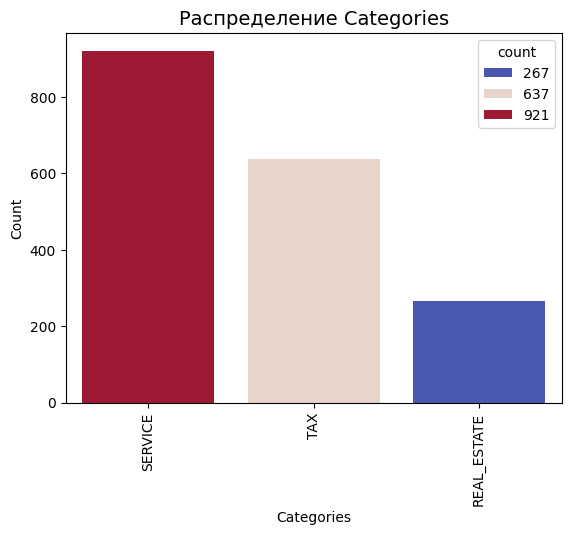

In [156]:
categories_plot(unfiltered.rename({'mislead_category': 'Category'}, axis=1))

Category
FOOD_GOODS        478
NON_FOOD_GOODS    455
SERVICE           234
LOAN              182
LEASING           161
REAL_ESTATE       129
NOT_CLASSIFIED    110
BANK_SERVICE       76
Name: count, dtype: int64


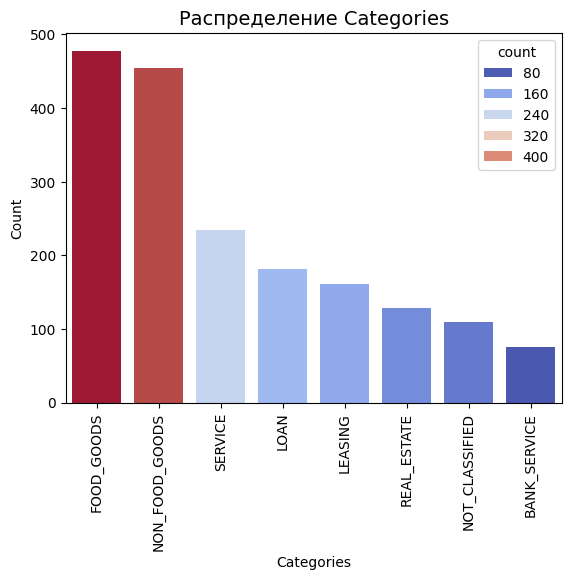

In [157]:
categories_plot(unfiltered.rename({'predicted_category': 'Category'}, axis=1))

In [158]:
unfiltered_copy = unfiltered
unfiltered_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   description         1825 non-null   object
 1   mislead_category    1825 non-null   object
 2   predicted_category  1825 non-null   object
dtypes: object(3)
memory usage: 42.9+ KB


In [159]:
def print_rows_with_substring(df, column_name, substring):
    mask = df[column_name].str.contains(substring)
    print(df[mask].head())

In [160]:
def remove_duplicates_by_substring(df, column_name, substring):
    mask = df[column_name].str.contains(substring)
    
    first_occurrence_index = mask.idxmax()
    new_mask = df.index == first_occurrence_index
    filtered_df = df[new_mask]
    filtered_df = pd.concat([filtered_df, df[~mask]])
    
    print('\n', print_rows_with_substring(filtered_df, column_name, substring))
    return filtered_df

In [161]:
substrings = [
    'займ', 'размещение рекламы', 'предоставление кредита',
    'минеральной питьевой', 'сброс загрязняющих веществ', 'доставк',
    'авиабилетов', 'помещени', 'долга', 'гостиниц', 'лизинг', 'возмещаемые',
    'накладной', 'кредит', 'недвиж', 'купли-продажи', 'содержание', 'запчасти',
    'средство', 'ДКП', 'возмещение', 'консультирование'
]

In [162]:
for substring in substrings:
    unfiltered_copy = remove_duplicates_by_substring(
        unfiltered_copy, 'description', substring
        )

                                         description mislead_category  \
0  Возврат денежных средств по договору займа №37...              TAX   

  predicted_category  
0               LOAN  

 None
Empty DataFrame
Columns: [description, mislead_category, predicted_category]
Index: []

 None
Empty DataFrame
Columns: [description, mislead_category, predicted_category]
Index: []

 None
                                         description mislead_category  \
5  Оплата минеральной питьевой воды по счету 4882...              TAX   

  predicted_category  
5         FOOD_GOODS  

 None
                                         description mislead_category  \
6  Оплата Дог №Е04249/42 от 17.06.2024 г., согл. ...              TAX   

  predicted_category  
6     NOT_CLASSIFIED  

 None
                                          description mislead_category  \
15  За доставку водным транспортом из г. Рязань в ...              TAX   

   predicted_category  
15            SERVICE  

 None
        

In [163]:
unfiltered_copy

,description,mislead_category,predicted_category
44,Оплата за консультирование в сфере информацион...,TAX,SERVICE
248,Оплата ДКП №01694Г от 12.04.2023 за коттедж №2...,TAX,REAL_ESTATE
248,Оплата ДКП №01694Г от 12.04.2023 за коттедж №2...,TAX,REAL_ESTATE
459,Оплата за Чистящее средство для туалета Домест...,TAX,NON_FOOD_GOODS
140,Оплата за запчасти по договору поставки №80А-0...,TAX,NON_FOOD_GOODS
...,...,...,...
1819,За участие в конференции в г. Черкесск по дого...,REAL_ESTATE,SERVICE
1820,За участие в конференции в г. Саранск по догов...,REAL_ESTATE,SERVICE
1821,"Оплата по счету 0366,0367,0368 от 16/09/2024г....",REAL_ESTATE,LEASING
1823,Оплата по счету #0017 от 18.07.2023 г. за яхту...,REAL_ESTATE,NOT_CLASSIFIED


In [164]:
with open('unfiltered.csv', 'w') as f:
    unfiltered_copy.to_csv(f, index=False)